# ARIMA

In [1]:
import quandl
import warnings
import itertools
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')


from statsmodels.tsa.seasonal import seasonal_decompose


from arima_utils import ad_fuller_test, plot_rolling_stats
from arima_utils import plot_acf_pacf, arima_gridsearch_cv

C:\Anaconda2\envs\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

# specify to ignore warning messages
warnings.filterwarnings("ignore") 

## Getting the Data

In [3]:
df = quandl.get("BUNDESBANK/BBK01_WT5511", end_date="2017-07-31")
print(df.shape)

new_df = df.reindex(pd.date_range(df.index.min(), 
                                  df.index.max(), 
                                  freq='D')).fillna(method='ffill')
print(new_df.shape)
#close_series = new_df.Close

(12152, 1)
(17550, 1)


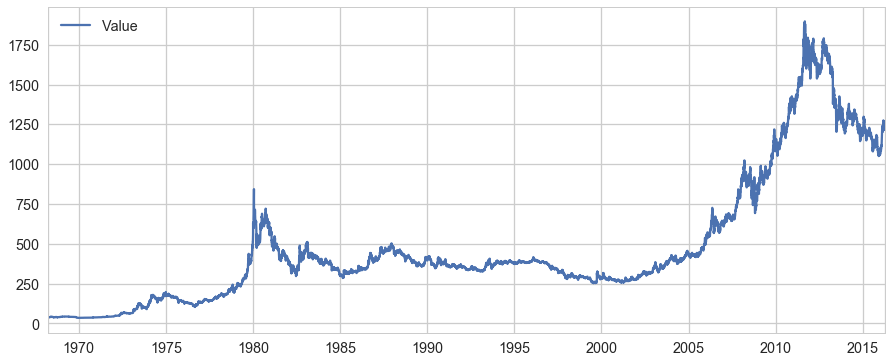

In [4]:
new_df.plot(figsize=(15, 6))
plt.show()

## Decompose

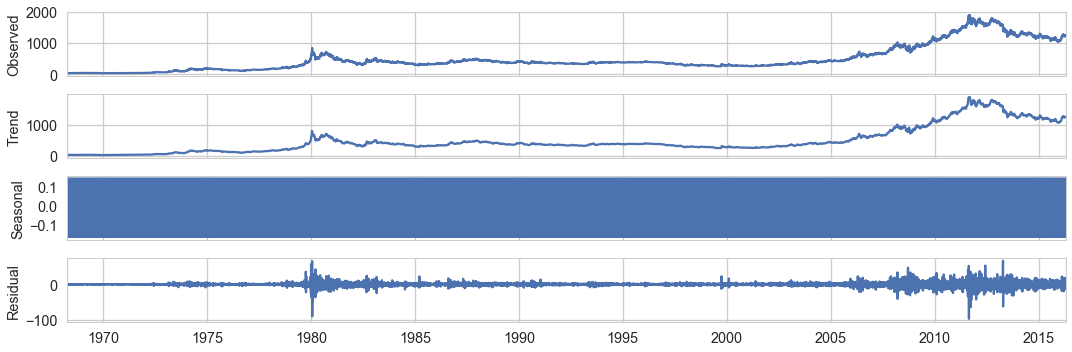

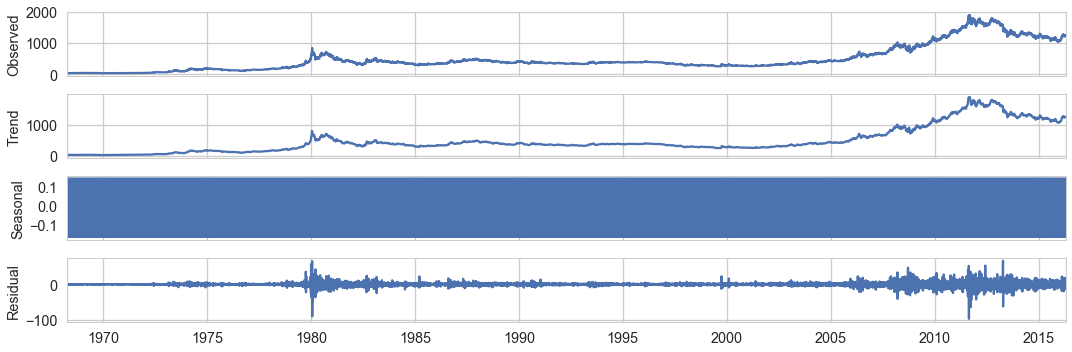

In [5]:
decompose = seasonal_decompose(new_df.Value.interpolate())
decompose.plot()

## Dickey Fuller Test

### Original Series

Test Statistic                    -0.364334
p-value                            0.915886
#Lags Used                        43.000000
Number of Observations Used    17506.000000
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
Critical Value (1%)               -3.430724
dtype: float64


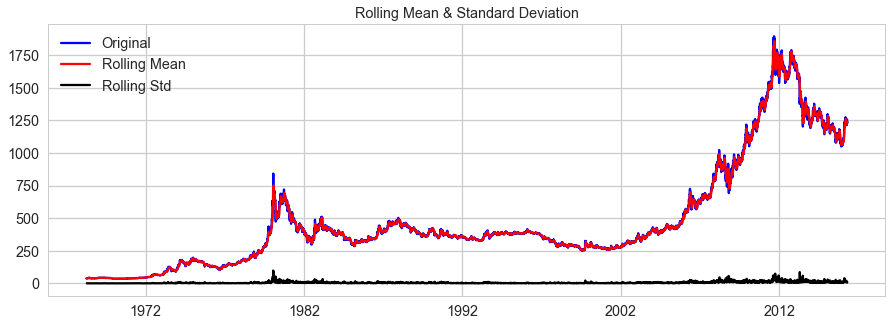

In [6]:
# Original Series
ad_fuller_test(new_df.Value)
plot_rolling_stats(new_df.Value)

### Log Series

Test Statistic                    -1.849748
p-value                            0.356057
#Lags Used                        29.000000
Number of Observations Used    17520.000000
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
Critical Value (1%)               -3.430723
dtype: float64


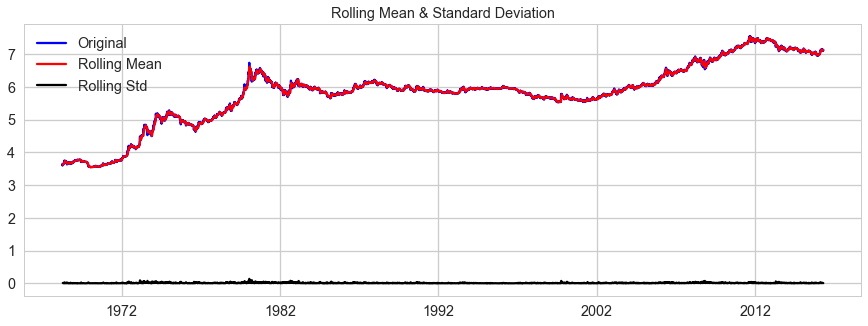

In [7]:
log_series = np.log(new_df.Value)

ad_fuller_test(log_series)
plot_rolling_stats(log_series)

### Log Difference

In [8]:
# Using log series with a shift to make it stationary
log_series_shift = log_series - log_series.shift()
log_series_shift = log_series_shift[~np.isnan(log_series_shift)]

Test Statistic                   -23.917175
p-value                            0.000000
#Lags Used                        28.000000
Number of Observations Used    17520.000000
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
Critical Value (1%)               -3.430723
dtype: float64


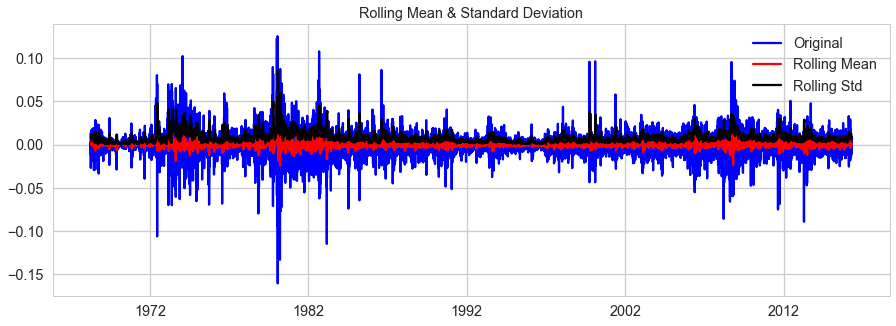

In [9]:
ad_fuller_test(log_series_shift)
plot_rolling_stats(log_series_shift)

## ACF/ PACF

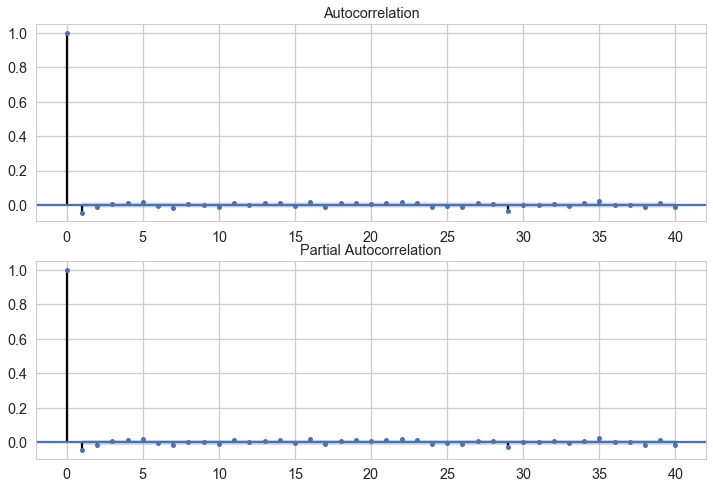

In [11]:
plot_acf_pacf(log_series_shift)

Log Differenced series seems stationary, same is visible through ACF and PACF plots

## ARIMA

In [12]:
new_df['log_series'] = log_series
new_df['log_series_shift'] = log_series_shift

### Training-Testing Split

********************
Iteration 1 of 5
TRAIN: [   0    1    2 ..., 2922 2923 2924] TEST: [2925 2926 2927 ..., 5847 5848 5849]
Train shape:(2925,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:5358.675881541096
ARIMA(0, 0, 1)- AIC:1370.644173716044
ARIMA(0, 1, 0)- AIC:-17795.53995335306
ARIMA(0, 1, 1)- AIC:-17793.56497363464
ARIMA(1, 0, 0)- AIC:-17788.098388741855
ARIMA(1, 0, 1)- AIC:-17786.10419500408
ARIMA(1, 1, 0)- AIC:-17793.562143972762
ARIMA(1, 1, 1)- AIC:-17796.006063269502
Best Model params:(1, 1, 1) AIC:-17796.006063269502
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 2924
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8902.003
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 02 Sep 2017   AIC                         -17796.006
Time:                        19:38:56   BIC                         -17772.

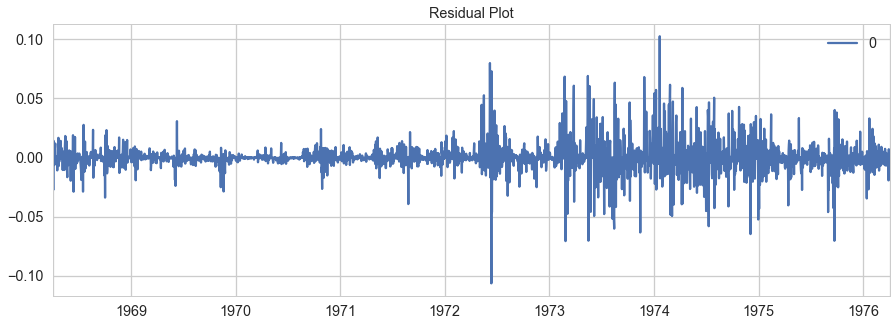

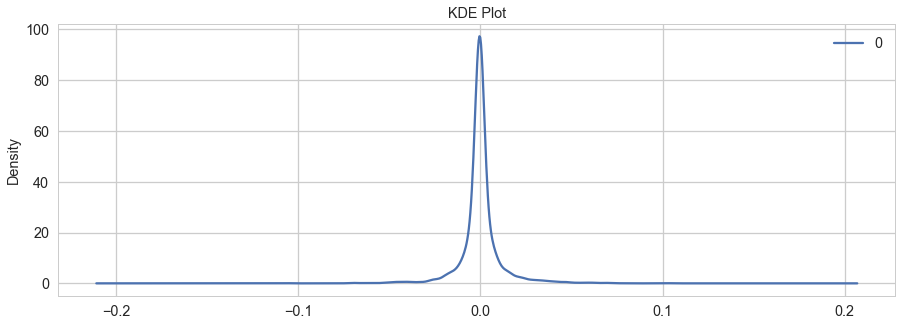

                  0
count  2.924000e+03
mean   1.877305e-07
std    1.152510e-02
min   -1.065016e-01
25%   -1.970487e-03
50%   -4.105400e-04
75%    1.345751e-03
max    1.024452e-01


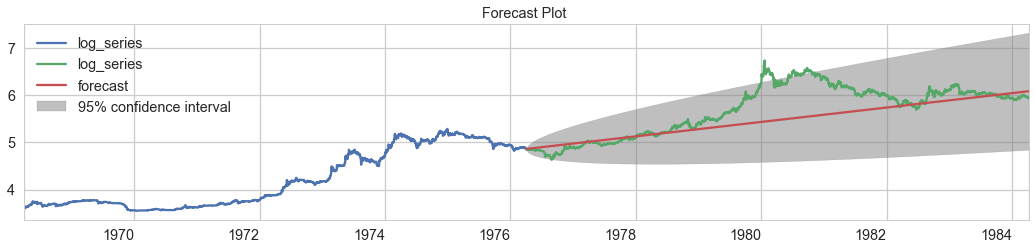

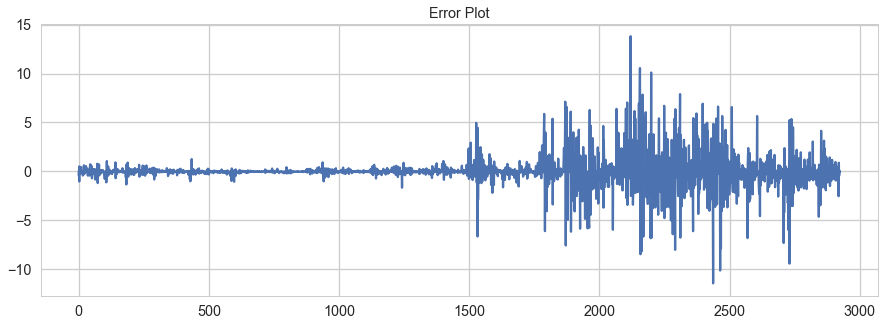

********************
Iteration 2 of 5
TRAIN: [   0    1    2 ..., 5847 5848 5849] TEST: [5850 5851 5852 ..., 8772 8773 8774]
Train shape:(5850,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:15792.660349788819
ARIMA(0, 0, 1)- AIC:7814.097096459958
ARIMA(0, 1, 0)- AIC:-33512.28307448926
ARIMA(0, 1, 1)- AIC:-33516.96483489898
ARIMA(1, 0, 0)- AIC:-33502.698980625006
ARIMA(1, 0, 1)- AIC:-33507.007684098426
ARIMA(1, 1, 0)- AIC:-33516.56690977644
ARIMA(1, 1, 1)- AIC:-33517.28713826041
Best Model params:(1, 1, 1) AIC:-33517.28713826041
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 5849
Model:                 ARIMA(1, 1, 1)   Log Likelihood               16762.644
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sat, 02 Sep 2017   AIC                         -33517.287
Time:                        19:39:01   BIC                         -33490.5

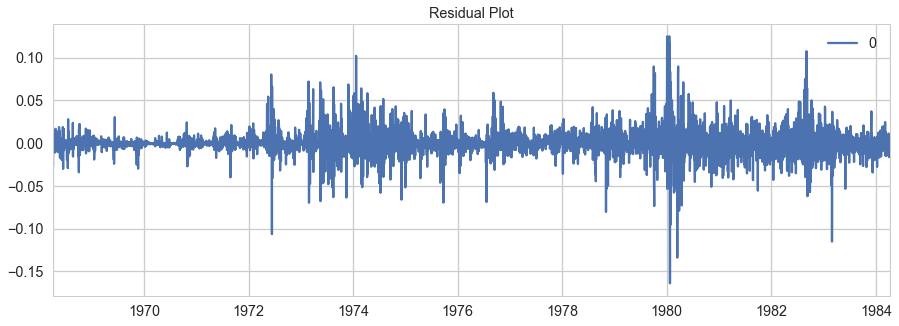

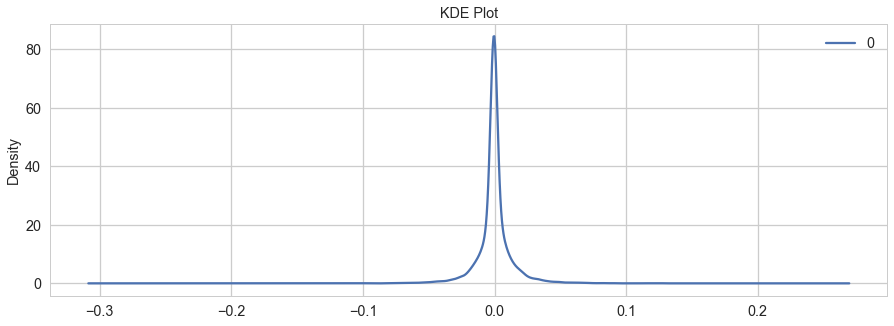

                  0
count  5.849000e+03
mean  -1.233252e-07
std    1.377704e-02
min   -1.640484e-01
25%   -2.716841e-03
50%   -4.121953e-04
75%    2.374837e-03
max    1.249847e-01


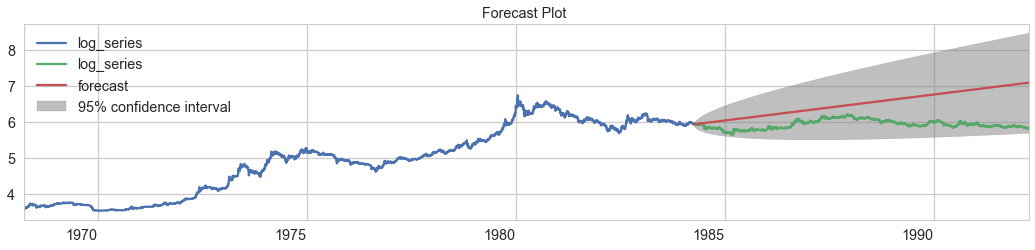

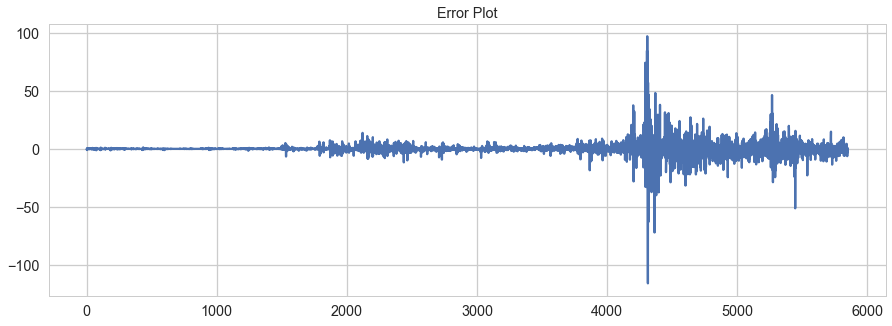

********************
Iteration 3 of 5
TRAIN: [   0    1    2 ..., 8772 8773 8774] TEST: [ 8775  8776  8777 ..., 11697 11698 11699]
Train shape:(8775,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:22924.700928334434
ARIMA(0, 0, 1)- AIC:10939.921256251526
ARIMA(0, 1, 0)- AIC:-52348.468958811376
ARIMA(0, 1, 1)- AIC:-52365.886422164316
ARIMA(1, 0, 0)- AIC:-52340.135707524285
ARIMA(1, 0, 1)- AIC:-52357.13694220425
ARIMA(1, 1, 0)- AIC:-52364.9954035126
ARIMA(1, 1, 1)- AIC:-52366.212486508346
Best Model params:(1, 1, 1) AIC:-52366.212486508346
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 8774
Model:                 ARIMA(1, 1, 1)   Log Likelihood               26187.106
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 02 Sep 2017   AIC                         -52366.212
Time:                        19:39:07   BIC                        

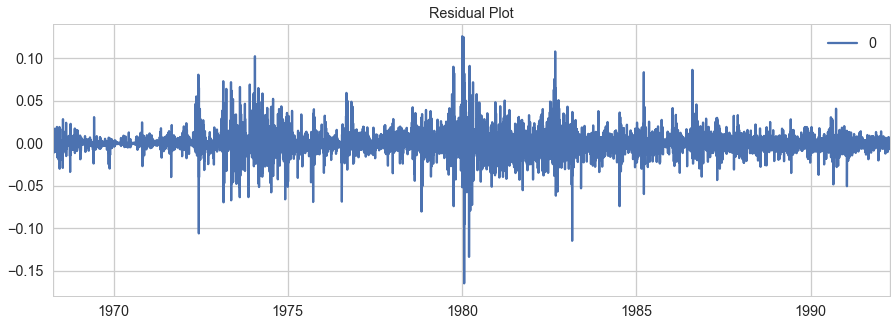

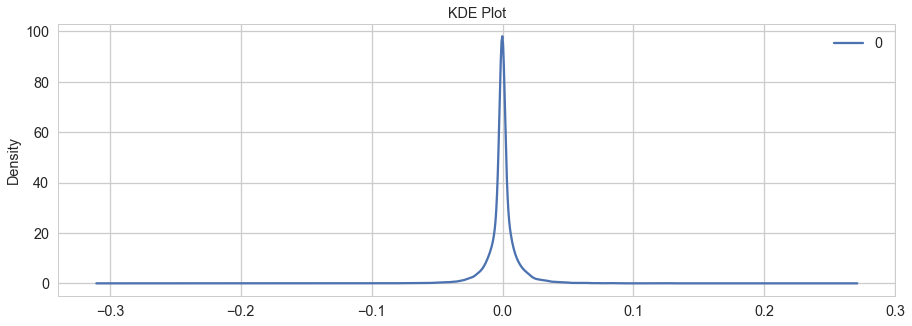

                  0
count  8.774000e+03
mean  -8.298166e-08
std    1.223435e-02
min   -1.650598e-01
25%   -2.567130e-03
50%   -2.630339e-04
75%    2.402586e-03
max    1.256746e-01


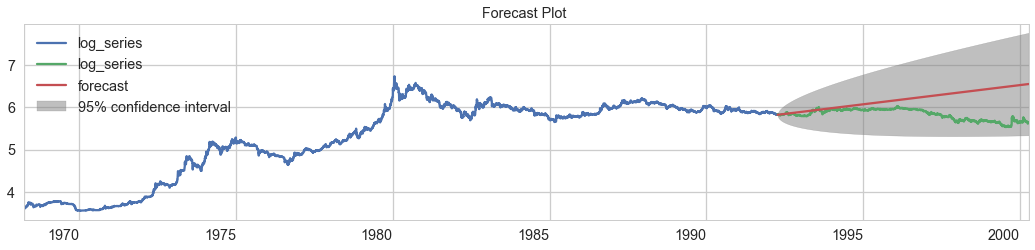

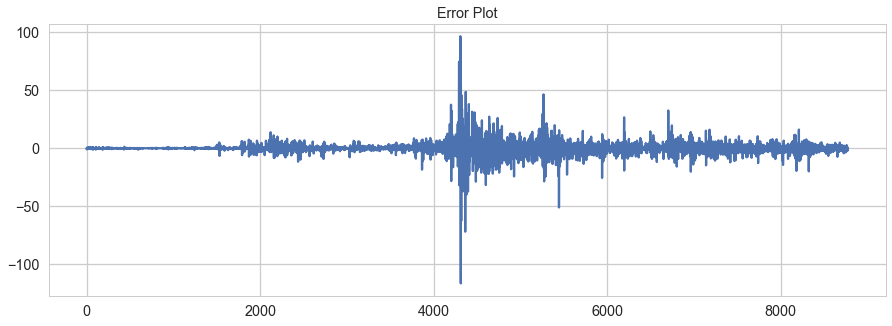

********************
Iteration 4 of 5
TRAIN: [    0     1     2 ..., 11697 11698 11699] TEST: [11700 11701 11702 ..., 14622 14623 14624]
Train shape:(11700,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:28323.593243498864
ARIMA(0, 0, 1)- AIC:12343.352798126089
ARIMA(0, 1, 0)- AIC:-72092.36827299207
ARIMA(0, 1, 1)- AIC:-72119.82137921233
ARIMA(1, 0, 0)- AIC:-72085.08760862946
ARIMA(1, 0, 1)- AIC:-72112.18893141265
ARIMA(1, 1, 0)- AIC:-72118.75588542139
ARIMA(1, 1, 1)- AIC:-72119.86496021658
Best Model params:(1, 1, 1) AIC:-72119.86496021658
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                11699
Model:                 ARIMA(1, 1, 1)   Log Likelihood               36063.932
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 02 Sep 2017   AIC                         -72119.865
Time:                        19:39:14   BIC                     

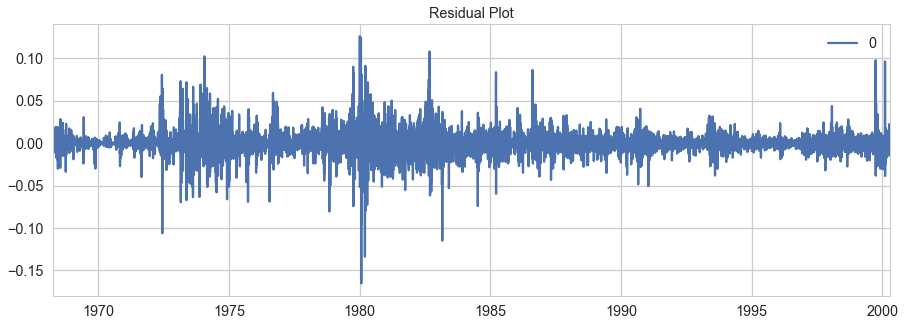

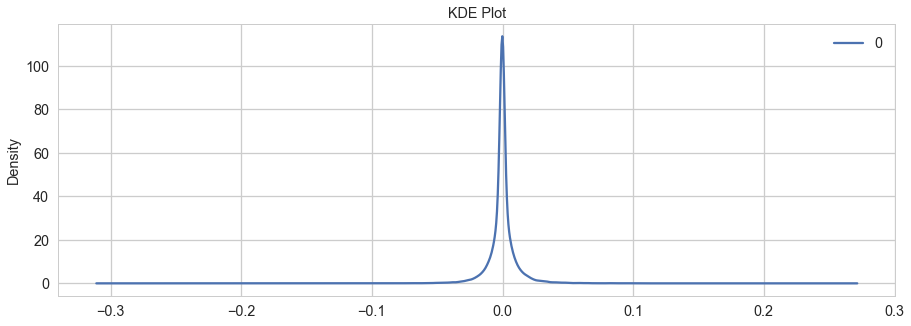

                  0
count  1.169900e+04
mean  -6.019278e-08
std    1.109183e-02
min   -1.652707e-01
25%   -2.322444e-03
50%   -1.811495e-04
75%    2.032718e-03
max    1.259057e-01


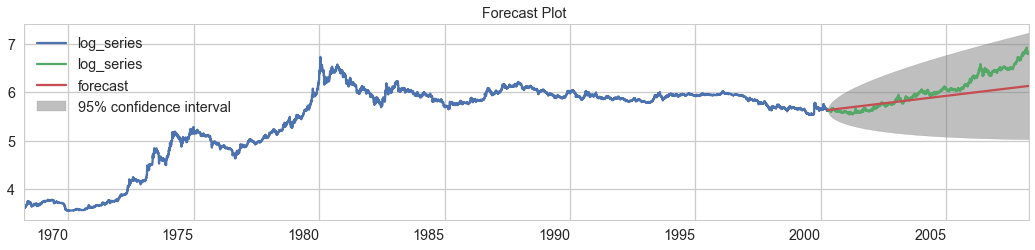

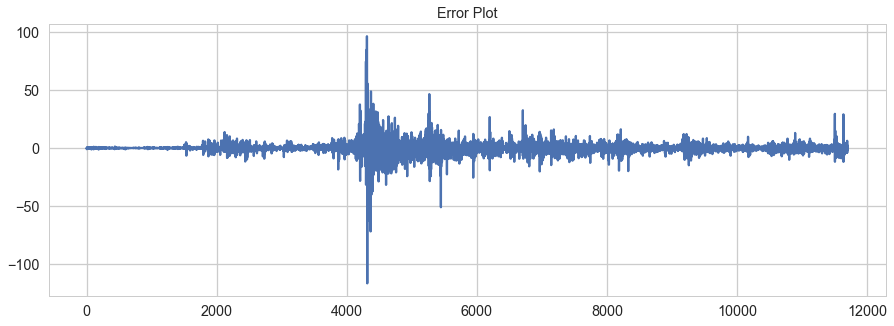

********************
Iteration 5 of 5
TRAIN: [    0     1     2 ..., 14622 14623 14624] TEST: [14625 14626 14627 ..., 17547 17548 17549]
Train shape:(14625,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:34336.88986620506
ARIMA(0, 0, 1)- AIC:14355.652400375791
ARIMA(0, 1, 0)- AIC:-91312.75496091215
ARIMA(0, 1, 1)- AIC:-91348.77150649179
ARIMA(1, 0, 0)- AIC:-91301.13184735598
ARIMA(1, 0, 1)- AIC:-91336.41118255563
ARIMA(1, 1, 0)- AIC:-91347.65810577202
ARIMA(1, 1, 1)- AIC:-91348.2994538057
Best Model params:(0, 1, 1) AIC:-91348.77150649179
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                14624
Model:                 ARIMA(0, 1, 1)   Log Likelihood               45677.386
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 02 Sep 2017   AIC                         -91348.772
Time:                        19:39:24   BIC                       

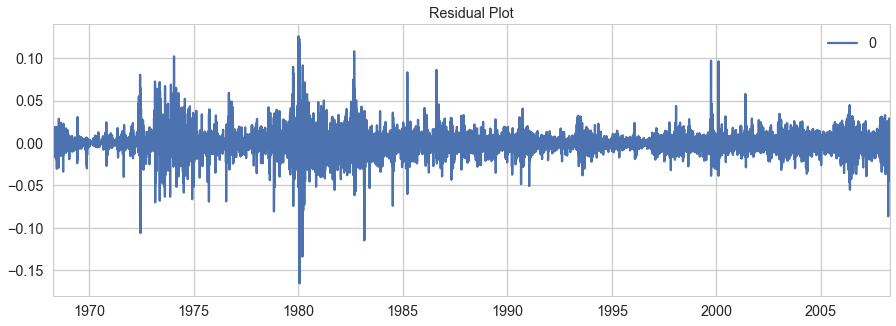

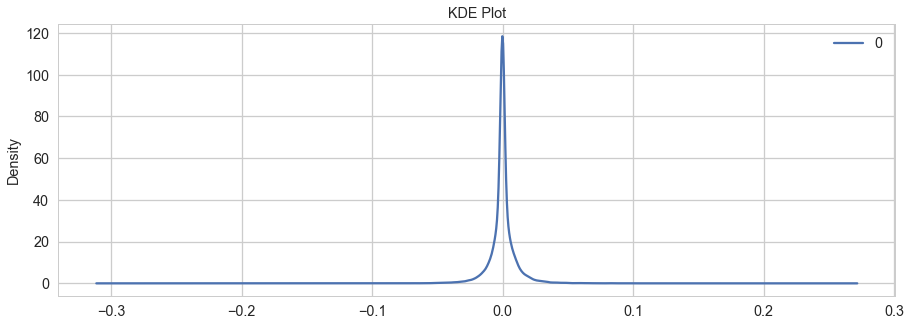

                  0
count  1.462400e+04
mean  -3.473076e-08
std    1.064827e-02
min   -1.656143e-01
25%   -2.387169e-03
50%   -2.301705e-04
75%    2.207817e-03
max    1.258538e-01


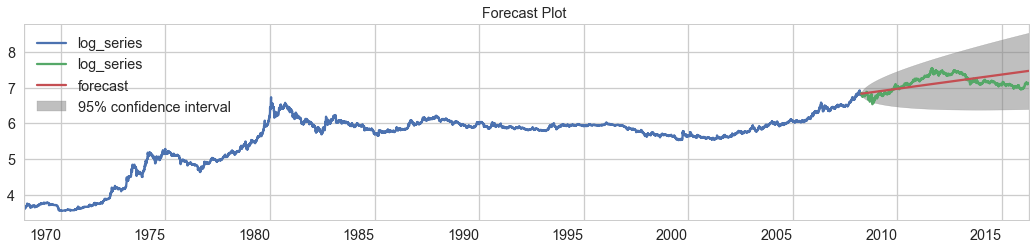

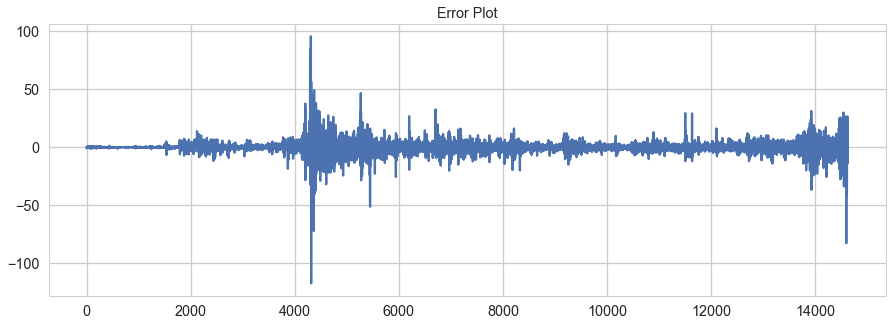

In [13]:
results_dict = arima_gridsearch_cv(new_df.log_series,cv_splits=5)